**Netflix - Story telling with data**

Loading libraries

In [1]:
# Numpy and Pandas libraries
import numpy as np
import pandas as pd

# Visualization libraries
#import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

# Loading the dataset and some EDA

In [2]:
movies = pd.read_csv('../../datasets/netflix_titles.csv')
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Columns `director`, `cast`, `country` and `listed_in` contain nested data.

In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


There are some missing values in some columns and `date_added` is an object type but should be datetime

In [4]:
print("The shape of the dataset is", movies.shape[0], "rows and ", movies.shape[1], "columns.")

The shape of the dataset is 8807 rows and  12 columns.


In [5]:
movies.duplicated().sum()

0

There are no duplicates

In [6]:
movies.show_id.nunique()

8807

In [7]:
movies.description.nunique()

8775

`show_id` and `description` are both unique or almost unique to each row and so are not useful for visualisation. I will drop them.

In [8]:
movies = movies.drop(['show_id', 'description'], axis=1)

Dealing with missing values

In [9]:
movies.isnull().sum() #missing values in numbers

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
dtype: int64

In [10]:
round(movies.isnull().sum() / movies.shape[0],4) * 100 #missing values as a percentage

type             0.00
title            0.00
director        29.91
cast             9.37
country          9.44
date_added       0.11
release_year     0.00
rating           0.05
duration         0.03
listed_in        0.00
dtype: float64

`director`, `cast`, `country` have a lot of null data.

We are going to fill them with "Unknown" for now in order to retain the records but will filter them out when necessary afterwards.

`date_added`, `rating`, `duration` all have less than 1% of missing data. We are going to fill them with the mode.

In [11]:
movies["director"] = movies["director"].fillna("Unknown")
movies["cast"] = movies["cast"].fillna("Unknown")
movies["country"] = movies["country"].fillna("Unknown")

In [12]:
columns_mode = ['date_added', 'rating', 'duration']
for i in columns_mode:
    mode = movies[i].mode()
    print(f"{i} mode is : {mode}%")
    print('---------------------------')

date_added mode is : 0    January 1, 2020
Name: date_added, dtype: object%
---------------------------
rating mode is : 0    TV-MA
Name: rating, dtype: object%
---------------------------
duration mode is : 0    1 Season
Name: duration, dtype: object%
---------------------------


In [13]:
movies.date_added = movies.date_added.fillna(movies.date_added.mode()[0])
movies.rating = movies.rating.fillna(movies.rating.mode()[0])
movies.duration = movies.duration.fillna(movies.duration.mode()[0])

In [14]:
movies.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [15]:
movies.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'TV-Y7-FV', 'UR'], dtype=object)

In [16]:
movies.groupby(['type', 'rating']).count()['title']

type     rating  
Movie    66 min         1
         74 min         1
         84 min         1
         G             41
         NC-17          3
         NR            75
         PG           287
         PG-13        490
         R            797
         TV-14       1427
         TV-G         126
         TV-MA       2064
         TV-PG        540
         TV-Y         131
         TV-Y7        139
         TV-Y7-FV       5
         UR             3
TV Show  NR             5
         R              2
         TV-14        733
         TV-G          94
         TV-MA       1147
         TV-PG        323
         TV-Y         176
         TV-Y7        195
         TV-Y7-FV       1
Name: title, dtype: int64

Some of the values in rating column look like they belong to the duration column. I will move them over.

In [17]:
movies.loc[movies.rating.str.contains('min'),'rating']

5541    74 min
5794    84 min
5813    66 min
Name: rating, dtype: object

In [18]:
movies.loc[5541,:]

type                      Movie
title           Louis C.K. 2017
director             Louis C.K.
cast                 Louis C.K.
country           United States
date_added        April 4, 2017
release_year               2017
rating                   74 min
duration               1 Season
listed_in                Movies
Name: 5541, dtype: object

In [19]:
movies.loc[movies.rating.str.contains('min'),'duration'] = movies.loc[movies.rating.str.contains('min'),'rating']
movies.loc[movies.rating.str.contains('min'), 'rating'] = movies.rating.mode()[0]

In [20]:
movies.loc[5541,:]

type                      Movie
title           Louis C.K. 2017
director             Louis C.K.
cast                 Louis C.K.
country           United States
date_added        April 4, 2017
release_year               2017
rating                    TV-MA
duration                 74 min
listed_in                Movies
Name: 5541, dtype: object

In [21]:
movies.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

We have no more missing values.

In [22]:
movies.date_added.dtype

dtype('O')

`date_added` is currently an object, changing its type to dataframe will give more flexibility to this variable.

In [23]:
movies["date_added"] = pd.to_datetime(movies['date_added'])

In [24]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8807 non-null   object        
 1   title         8807 non-null   object        
 2   director      8807 non-null   object        
 3   cast          8807 non-null   object        
 4   country       8807 non-null   object        
 5   date_added    8807 non-null   datetime64[ns]
 6   release_year  8807 non-null   int64         
 7   rating        8807 non-null   object        
 8   duration      8807 non-null   object        
 9   listed_in     8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 688.2+ KB


I am extracting some more variables from the datetime, to allow more flexibility when visualising the data.

In [25]:
movies['year_added'] = movies['date_added'].dt.year
movies['month_added'] = movies['date_added'].dt.month_name()
movies['day_added'] = movies['date_added'].dt.day_name()

In [26]:
movies.head(3)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,day_added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,September,Saturday
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021,September,Friday
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,September,Friday


In [27]:
print("The final shape of the dataset is", movies.shape[0], "rows and ", movies.shape[1], "columns.")

The final shape of the dataset is 8807 rows and  13 columns.


In [28]:
movies.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'year_added',
       'month_added', 'day_added'],
      dtype='object')

With the data cleaned up, let's ask some questions and find out the answers.

# What type of content does Netflix have?

In [29]:
movies.type.unique()

array(['Movie', 'TV Show'], dtype=object)

We have two types: Movies and TV Shows

How many of each do we have? Are they evenly distributed?

In [30]:
movies.type.value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [31]:
round(movies.type.value_counts(normalize=True)*100, 2)

Movie      69.62
TV Show    30.38
Name: type, dtype: float64

I will save this information in a separate variable for easier visualisation.

In [32]:
count_types = movies.type.value_counts().reset_index()
count_types.columns = ['Type', 'Count']
count_types["% Count"] = round(count_types.Count/count_types.Count.sum()*100,2)
count_types

,Type,Count,% Count
0,Movie,6131,69.62
1,TV Show,2676,30.38


Let's visualise the results.

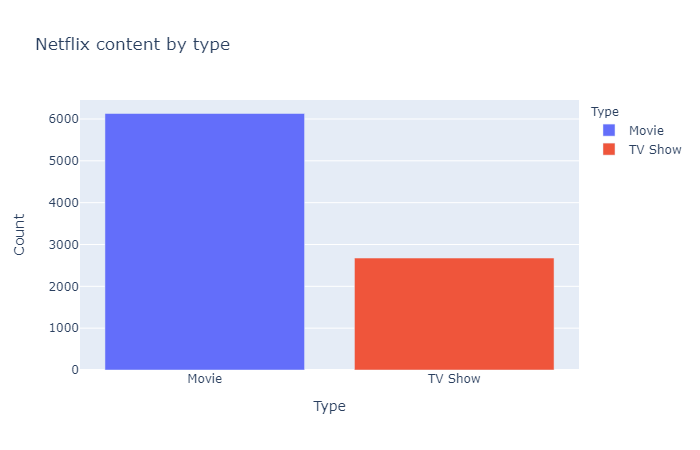

In [90]:
fig = px.bar(count_types, x = 'Type', y = 'Count',
            color= 'Type', title = 'Netflix content by type')
fig.show("png")

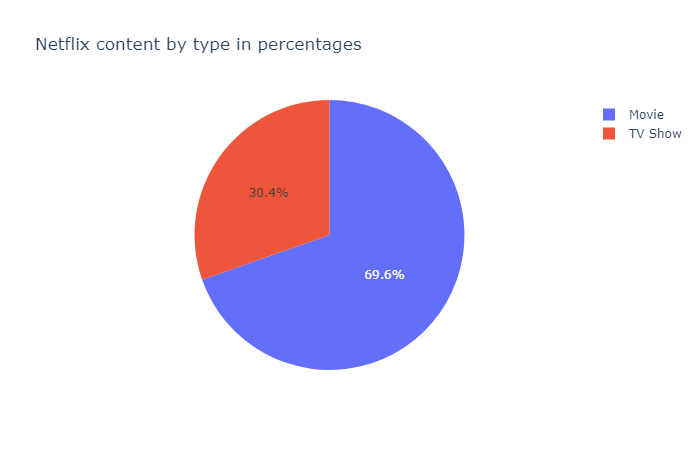

In [91]:
fig = px.pie(count_types, values = 'Count', names='Type',
                  color= 'Type', title = 'Netflix content by type in percentages')

fig.show("png")

**Conclusion:**

Just under 70% of all Netflix shows are movies, the remaining ones are TV Shows.

# Where was the content produced?

In [35]:
movies.country.nunique()

749

We have 555 unique countries in the dataset, that's more than there are in reality. Let's look at them.

In [36]:
movies.country.value_counts()

United States                             2818
India                                      972
Unknown                                    831
United Kingdom                             419
Japan                                      245
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 749, dtype: int64

In [37]:
round(movies.country.value_counts(normalize=True)*100, 1)

United States                             32.0
India                                     11.0
Unknown                                    9.4
United Kingdom                             4.8
Japan                                      2.8
                                          ... 
Romania, Bulgaria, Hungary                 0.0
Uruguay, Guatemala                         0.0
France, Senegal, Belgium                   0.0
Mexico, United States, Spain, Colombia     0.0
United Arab Emirates, Jordan               0.0
Name: country, Length: 749, dtype: float64

The third most frequent country is "Unknown" which are the missing values we filled earlier. Let's filter them out now.

In [38]:
countries_count = movies[movies.country != "Unknown"].country.value_counts()
countries_count

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

Some movies were produced in more than one country. Let's zoom into the top 20 to see how much of the total dataset they are.

In [39]:
tot = sum(countries_count)
top15 = sum(countries_count[:15]) 

print(f'All movies : {tot}')
print(f'Movies produced in top 15 countries : {top15}')
print(f'Percentage of movies produced in top 15 countries: {top15}/{tot} = {round(100 * top15/tot,2)} %')

All movies : 7976
Movies produced in top 15 countries : 5766
Percentage of movies produced in top 15 countries: 5766/7976 = 72.29 %


Top 15 countries constitute just over 70% of all movies. Let's create a new variable with the top 15 countries

In [40]:
top15_country = countries_count.head(15)
top15_country

United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Turkey             105
Nigeria             95
Australia           87
Taiwan              81
Indonesia           79
Name: country, dtype: int64

In [41]:
top15_country = top15_country.reset_index()
top15_country.columns = ['Country', 'Count']
top15_country

,Country,Count
0,United States,2818
1,India,972
2,United Kingdom,419
3,Japan,245
4,South Korea,199
5,Canada,181
6,Spain,145
7,France,124
8,Mexico,110
9,Egypt,106


In [42]:
fig_bar = px.bar(top15_country, y = 'Count', 
                 x= 'Country', color= 'Country')
fig_bar.update_layout(title= 'Distribution of top 20 producer countries')
fig_bar.show()

In [43]:
fig_pie = px.pie(top15_country, values = 'Count', names= 'Country')
fig_pie.update_layout(title= 'Distribution of top 20 producer countries')
fig_pie.show()

**Conclusion:**

The United States produced the most movies followed by India. When zooming into top 15 producing countries The United States produced almost 50% of movies and India produced just under 17%. However, we need to remember that this set contains only 72.29 % of all data and that when the whole set was considered those percantages were lower, 32.6% and 12.5% respectivaly. We also need to remember that 7.6% were missing values.

# How old is the content on Netflix?

In [44]:
top15_list = top15_country.Country.tolist()
top15_list

['United States',
 'India',
 'United Kingdom',
 'Japan',
 'South Korea',
 'Canada',
 'Spain',
 'France',
 'Mexico',
 'Egypt',
 'Turkey',
 'Nigeria',
 'Australia',
 'Taiwan',
 'Indonesia']

In [45]:
top15_df = movies.loc[movies.country.isin(top15_list)]
top15_df.head(3)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,day_added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,September,Saturday
4,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",2021,September,Friday
8,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",2021,September,Friday


In [46]:
fig = px.treemap(top15_df, path=['country', 'release_year'], title="Release year of content added to Netflix by top 15 countries")
fig.show()

**Conclusion:**

Looking at the release years of movies produced by the top 15 countries it is clear that most of the content is very recent. Let's have a look at the data overall.

In [47]:
fig = px.treemap(movies, path=['release_year'], title="Release year of Netflix content")
fig.show()

**Conclusion:**

Overall, the vast majority of the content are recent productions (around 60% of the content was release in the last 6 years). We can also see a steady increase of content added year by year with a decline in 2021.

# How much content was added each year?

Movies

In [48]:
all_movie = movies[movies["type"] == "Movie"]
all_movie.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,day_added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,September,Saturday
6,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,PG,91 min,Children & Family Movies,2021,September,Friday


In [49]:
content_movie = all_movie['year_added'].value_counts().reset_index()
content_movie.columns = ['year_added', 'count_movies']
content_movie.head(2)

,year_added,count_movies
0,2019,1424
1,2020,1284


In [50]:
content_movie = content_movie.sort_values(by= 'year_added')
content_movie

,year_added,count_movies
12,2008,1
11,2009,2
13,2010,1
8,2011,13
10,2012,3
9,2013,6
7,2014,19
6,2015,56
5,2016,253
4,2017,839


In [51]:
fig = px.scatter(content_movie, x='year_added', y='count_movies')
fig.update_traces(mode="markers+lines")

fig.update_layout(title="[Movies] - Content added over the different years")
fig.show()

TV Shows

In [52]:
all_tvshow = movies[movies["type"] == "TV Show"]
all_tvshow.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,day_added
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021,September,Friday
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,September,Friday


In [53]:
content_tvshow = all_tvshow['year_added'].value_counts().reset_index()
content_tvshow.columns = ['year_added', 'count_tvshows']
content_tvshow.head(2)

,year_added,count_tvshows
0,2020,605
1,2019,592


In [54]:
content_tvshow = content_tvshow.sort_values(by= 'year_added')
content_tvshow

,year_added,count_tvshows
9,2008,1
8,2013,5
7,2014,5
6,2015,26
5,2016,176
4,2017,349
3,2018,412
1,2019,592
0,2020,605
2,2021,505


In [55]:
fig = px.scatter(content_tvshow, x='year_added', y='count_tvshows') #, text='year_added' to be used for other variable not on the scale already
fig.update_traces(mode="markers+lines")
#fig.update_traces(textposition="bottom right") with the other above

fig.update_layout(title="[TV Shows] - Content added over the different years")
fig.show()

Let's combine the two graphs in one to better see the difference.

In [56]:
#content_all = pd.concat([content_movie, content_tvshow], on= 'year_added', axis=1)
content_all = content_movie.merge(content_tvshow, how= 'left', on= ['year_added'])
content_all.head(3)

,year_added,count_movies,count_tvshows
0,2008,1,1.0
1,2009,2,NaN
2,2010,1,NaN


In [57]:
content_all['count_tvshows'] = content_all['count_tvshows'].fillna(0).astype('int64')
content_all

,year_added,count_movies,count_tvshows
0,2008,1,1
1,2009,2,0
2,2010,1,0
3,2011,13,0
4,2012,3,0
5,2013,6,5
6,2014,19,5
7,2015,56,26
8,2016,253,176
9,2017,839,349


In [58]:
fig = px.scatter(content_all, x='year_added', y=['count_movies', 'count_tvshows'])
fig.update_traces(mode="markers+lines")

fig.update_layout(title="[Movies] - Content added over the different years")
fig.show()

**Conclusion:**

    From 2015 till 2019 there has been a significant increase in new content addition
    The content addition has decreased in 2020 due to Covid but more drastically for movies than for TV shows
    Movies were added in much larger pace than TV shows

# In which month most content was added?

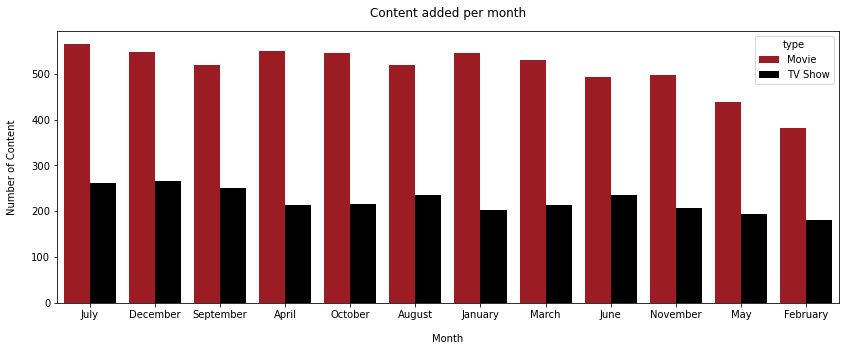

In [59]:
fig, ax = plt.subplots(figsize=(14, 5))

ax = sns.countplot(x='month_added',
                   data=movies, hue='type', 
                   order=movies.month_added.value_counts().index, 
                  palette=["#B00710","#000000"])

ax.set_xlabel('Month', labelpad=14)
ax.set_ylabel('Number of Content', labelpad=14)
ax.set_title('Content added per month', pad=14)
plt.show()

In [60]:
year_month_count = (
                    movies
                    .loc[:,['year_added', 'month_added']]
                    .value_counts()
                    .reset_index()
                    .rename(columns={0:'count'})
                    .pivot("month_added", "year_added", "count")
                    .fillna(0)
                    .apply(lambda x: x.astype('int'))
                )

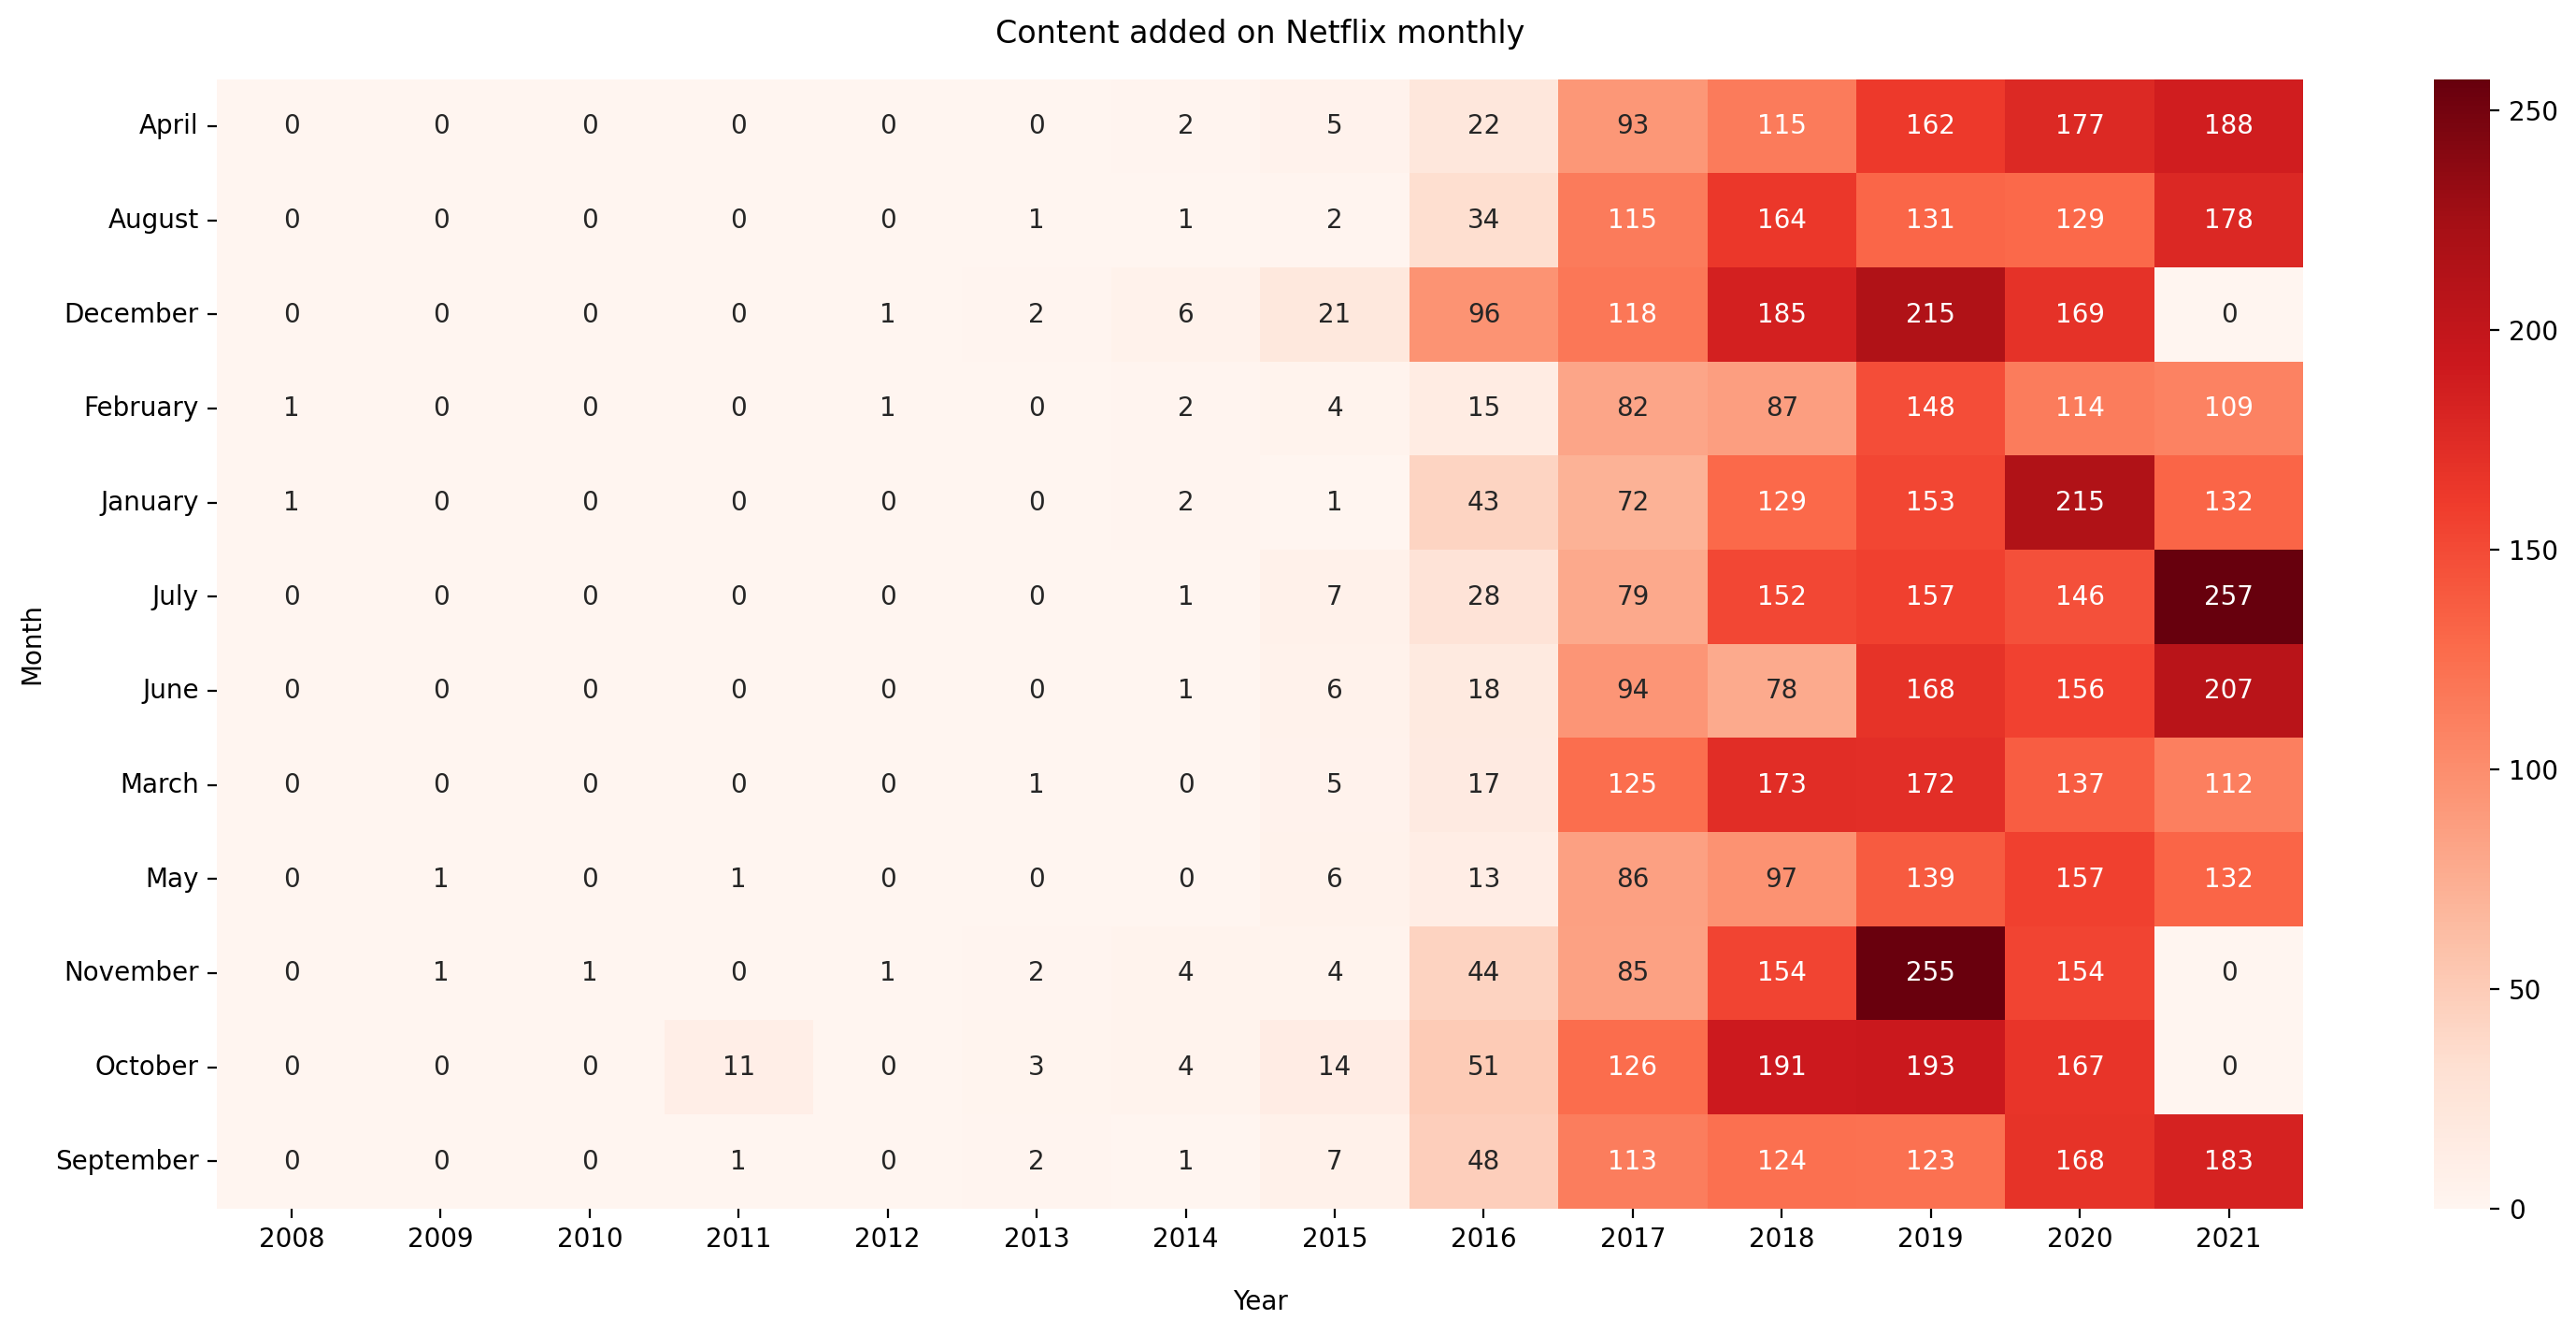

In [61]:
plt.figure(figsize=(18,8), dpi=200)
ax = sns.heatmap(year_month_count, annot=True, fmt="d", cmap='Reds')
ax.set_xlabel('Year', labelpad=14)
ax.set_ylabel('Month')
ax.set_title('Content added on Netflix monthly', pad=14)
plt.show()

**Conclusion:**
    
    As per the bar chart July and December were the months in which most content was added.
    However, the heatmap suggests that November could also be a month when most content was added but the result is skewed  by missing data for Nov 2021.
    We do not have all the data for year 2021 as the last quarter is missing.

# On which weekday most content was added?

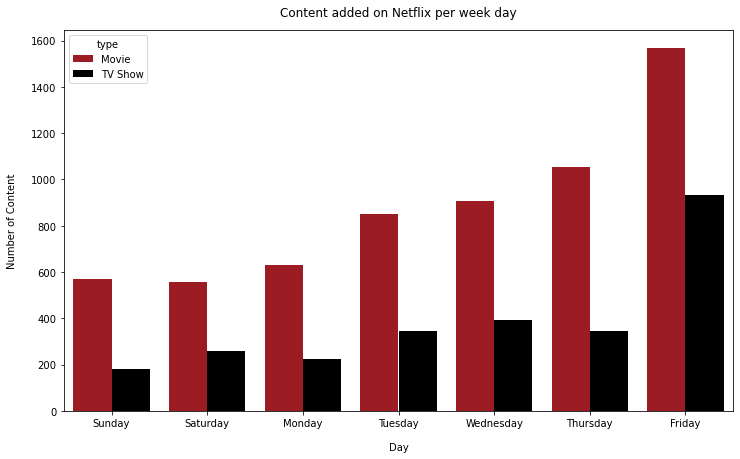

In [62]:
plt.figure(figsize=(12, 7))
ax = sns.countplot(x='day_added',data=movies, 
                   hue='type', 
                   order=movies.day_added.value_counts().sort_values().index, 
                   palette=["#B00710","#000000"])

ax.set_title('Content added per week day')
ax.set_xlabel('Day', labelpad=14)
ax.set_ylabel('Number of Content', labelpad=14)
ax.set_title('Content added on Netflix per week day', pad=14)
plt.show()

**Conclusion:**
    
    Most content for both movies and TV shows was added on Fridays.

# What is the most common duration of movies?

In [63]:
movies[movies['duration'].str.contains('min')]['duration']

0        90 min
6        91 min
7       125 min
9       104 min
12      127 min
         ...   
8801     96 min
8802    158 min
8804     88 min
8805     88 min
8806    111 min
Name: duration, Length: 6131, dtype: object

In [64]:
movie_durations = movies[movies['duration'].str.contains('min')]['duration'].apply(lambda x: x.split()[0]).astype('int')

In [65]:
movie_durations

0        90
6        91
7       125
9       104
12      127
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: duration, Length: 6131, dtype: int32

In [66]:
movie_durations.mean()

99.56499755341706

In [67]:
movie_durations.median()

98.0

In [68]:
movie_durations.mode()

0    90
Name: duration, dtype: int32

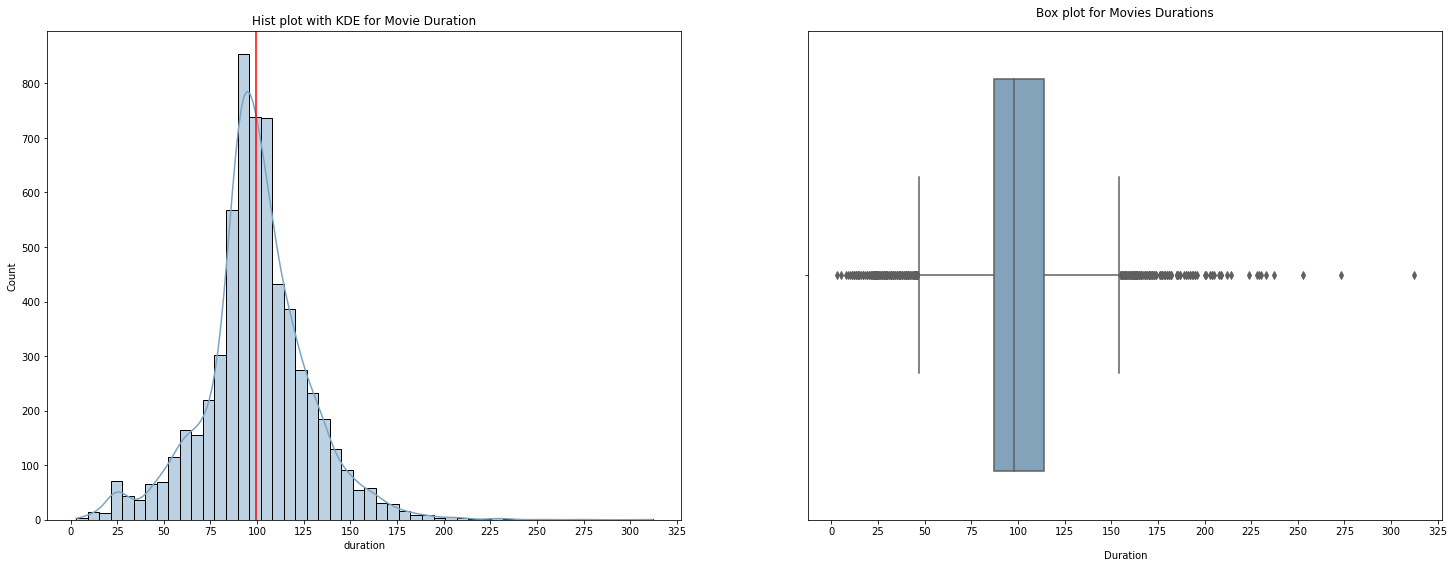

In [69]:
# Hist plot with KDE
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25,9))
g = sns.histplot(movie_durations, kde=True, color="#7aa4c4", bins=50, ax = ax1)
ax1.set_title('Hist plot with KDE for Movie Duration')
g.set(xticks=np.arange(0, 350, 25))
g.axvline(x=movie_durations.mean(), color='red')

# Box plot
sns.boxplot(x=movie_durations, color="#7aa4c4", ax = ax2)
ax2.set_xticks(np.arange(0,350, 25))
ax2.set_xlabel('Duration', labelpad=14)
ax2.set_title('Box plot for Movies Durations', pad=14)
plt.show()

**Conclusion:**
    
    The average duration is around 100 min.
    The meadian and mode are slightly lover than average which means that more movies are shorter rather than longer than     average.

# What are the most common genres?

The variable listed_in contains the genre of each movie or TV show. Let's have a look what they are.

In [70]:
movies['listed_in'].value_counts()

Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: listed_in, Length: 514, dtype: int64

Some movies are listed in more than one category, we are going to split them to create a list.

In [71]:
movies_listed = ", ".join(movies['listed_in']).split(", ") #this create a long list of categories, I will print only top 5
movies_listed[:5]

['Documentaries',
 'International TV Shows',
 'TV Dramas',
 'TV Mysteries',
 'Crime TV Shows']

Let's transform this list into a DataFrame.

In [72]:
movies_listed = pd.DataFrame(movies_listed, columns= ['genre'])
movies_listed

,genre
0,Documentaries
1,International TV Shows
2,TV Dramas
3,TV Mysteries
4,Crime TV Shows
...,...
19318,Children & Family Movies
19319,Comedies
19320,Dramas
19321,International Movies


In [73]:
genre_counts_ = movies_listed.value_counts().reset_index()
genre_counts_.columns= ['genre', 'count']
genre_counts_

,genre,count
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,International TV Shows,1351
4,Documentaries,869
5,Action & Adventure,859
6,TV Dramas,763
7,Independent Movies,756
8,Children & Family Movies,641
9,Romantic Movies,616


Now we can see which categories have the most content. Let's visialise the results.

In [74]:
fig_bar = px.bar(genre_counts_, x = 'count', y= 'genre', color= 'genre',
                 orientation='h')
fig_bar.update_layout(title= 'Distribution of the most frequent genres')

fig_bar.show()

The plot is difficult to read. Let's zoom into top 5 and bottom 5 to see the most and least numerous categories.

In [75]:
fig_bar = px.bar(genre_counts_.head(5), x = 'count', y= 'genre', color= 'genre', orientation='h')
fig_bar.update_layout(title= 'Distribution of the 5 most frequent genres')

fig_bar.show()

In [76]:
fig_bar = px.bar(genre_counts_.tail(5), x = 'count', y= 'genre', color= 'genre', orientation='h')
fig_bar.update_layout(title= 'Distribution of the 5 most frequent genres')

fig_bar.show()

**Conclusion:**
    
    The most common genres are International Movies followed by Dramas and Comedies.
    The least common are TV Shows.

# Who are the most popular directors?

In [77]:
all_movie = movies[movies["type"] == "Movie"]

In [78]:
director_count = all_movie.director.value_counts()
director_count

Unknown                       188
Rajiv Chilaka                  19
Raúl Campos, Jan Suter         18
Suhas Kadav                    16
Marcus Raboy                   15
                             ... 
Sion Sono                       1
Dennis Rovira van Boekholt      1
Naoto Amazutsumi                1
Jenny Gage                      1
Mozez Singh                     1
Name: director, Length: 4355, dtype: int64

Let's remove the "Unknown"

In [79]:
director_count = all_movie[all_movie.director != "Unknown"].director.value_counts()
director_count

Rajiv Chilaka                 19
Raúl Campos, Jan Suter        18
Suhas Kadav                   16
Marcus Raboy                  15
Jay Karas                     14
                              ..
Dennis Rovira van Boekholt     1
Naoto Amazutsumi               1
Jenny Gage                     1
Kaila York                     1
Mozez Singh                    1
Name: director, Length: 4354, dtype: int64

In [80]:
director_count = director_count.reset_index()
director_count.columns = ['director', 'count']
director_count

,director,count
0,Rajiv Chilaka,19
1,"Raúl Campos, Jan Suter",18
2,Suhas Kadav,16
3,Marcus Raboy,15
4,Jay Karas,14
...,...,...
4349,Dennis Rovira van Boekholt,1
4350,Naoto Amazutsumi,1
4351,Jenny Gage,1
4352,Kaila York,1


In [81]:
fig_bar = px.bar(director_count.iloc[:20,:], x = 'director', y= 'count',
                color= 'director')
fig_bar.update_layout(title= 'Distribution of the top directors')

fig_bar.show()

**Conclusion**

    The most popular director is Rajiv Chilaka who is an Indian cartoon creator.
    The second most popular pair of directors Raul Campos & Jan Suter followed by Suhas Kadav.
    

# Who is the most popular actor?

In [82]:
movies_ = movies[movies.cast != "Unknown"]

In [83]:
movies_.cast.unique()

array(['Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng',
       'Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera',
       'Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar',
       ...,
       'Jesse Eisenberg, Woody Harrelson, Emma Stone, Abigail Breslin, Amber Heard, Bill Murray, Derek Graf',
       'Tim Allen, Courteney Cox, Chevy Chase, Kate Mara, Ryan Newman, Michael Cassidy, Spencer Breslin, Rip Torn, Kevin Zegers',
       'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy'],
      dtype=obje

In [84]:
actors_listed = ", ".join(movies_['cast']).split(", ") #this creates a long list of all actors

In [85]:
actors_listed = pd.DataFrame(actors_listed, columns= ['actor'])
actors_listed

,actor
0,Ama Qamata
1,Khosi Ngema
2,Gail Mabalane
3,Thabang Molaba
4,Dillon Windvogel
...,...
64121,Manish Chaudhary
64122,Meghna Malik
64123,Malkeet Rauni
64124,Anita Shabdish


In [86]:
actors_listed = actors_listed.value_counts().reset_index()
actors_listed.columns= ['actor', 'count']
actors_listed

,actor,count
0,Anupam Kher,43
1,Shah Rukh Khan,35
2,Julie Tejwani,33
3,Naseeruddin Shah,32
4,Takahiro Sakurai,32
...,...,...
36434,Chinmay Kambli,1
36435,Kumiko Aso,1
36436,Kumarakom Vasudevan,1
36437,Kumar Varun,1


In [87]:
fig_bar = px.bar(actors_listed.head(20), x = 'count', y= 'actor', color= 'actor', orientation='h')
fig_bar.update_layout(title= 'Distribution of the 20 popular actors')

fig_bar.show()

**Conclusion**

    The most popular actor is Anupam Kher, followed by Shah Rukh Khan, both of them are indian actors
    The third most popular is Julie Tejwani who is an Indian voice over artist.

In [89]:
import plotly; plotly.__version__

'4.12.0'